In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import pprint
import math
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv("diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Shape:",df.shape)
print("-"*40)
print("Columns: ", df.columns)
print("-"*40)
print(df.info())
print("-"*40)
print("Null value check\n:", df.isnull().sum())
print("-"*40)


Shape: (768, 9)
----------------------------------------
Columns:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), in

In [4]:
print("Descriptive statistics:\n", df.describe())

Descriptive statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0

In [5]:
zero_counts = (df == 0).sum()
print(zero_counts)


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [6]:
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# Replacing zeros with NaN
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Filling NaN with median
df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


EDA

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
print("Unique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Unique values in each column:
Pregnancies: 17
Glucose: 135
BloodPressure: 46
SkinThickness: 50
Insulin: 185
BMI: 247
DiabetesPedigreeFunction: 517
Age: 52
Outcome: 2


In [9]:
print("Unique values in the output label\n:")
df["Outcome"].unique()


Unique values in the output label
:


array([1, 0])

In [10]:

print("Count of each outcome value:\n")
df["Outcome"].value_counts()

# 0: Non Diabetic
# 1: Diabetic

Count of each outcome value:



Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
 #Output label / Target variable / Y-label : data distribution 
# pie-plot : proportion of Diabetic v/s Non Diabetic

px.pie(df, 
       names ='Outcome',
       color = 'Outcome',
       color_discrete_sequence = ['#007500','#5CFF5C'],
       title = "Data Distribution: Diabetic vs Non-Diabetic")


# Inferences :

# The dataset is imbalanced (Non-Diabetic : Diabetic = 65:35)
# There are more cases of Non-Diabetic patients than Diabetic patients.
# For imbalanced datasets, accuracy can be a misleading metric.
# For example, if 65% of the cases are Non-Diabetic, the model may always predict "Non-Diabetic" 
# and still achieve 65% accuracy.
# In such cases, we need to focus on metrics like Precision, Recall, F1-score, or use Balanced Accuracy.


Creating Correlation wuth Target variable

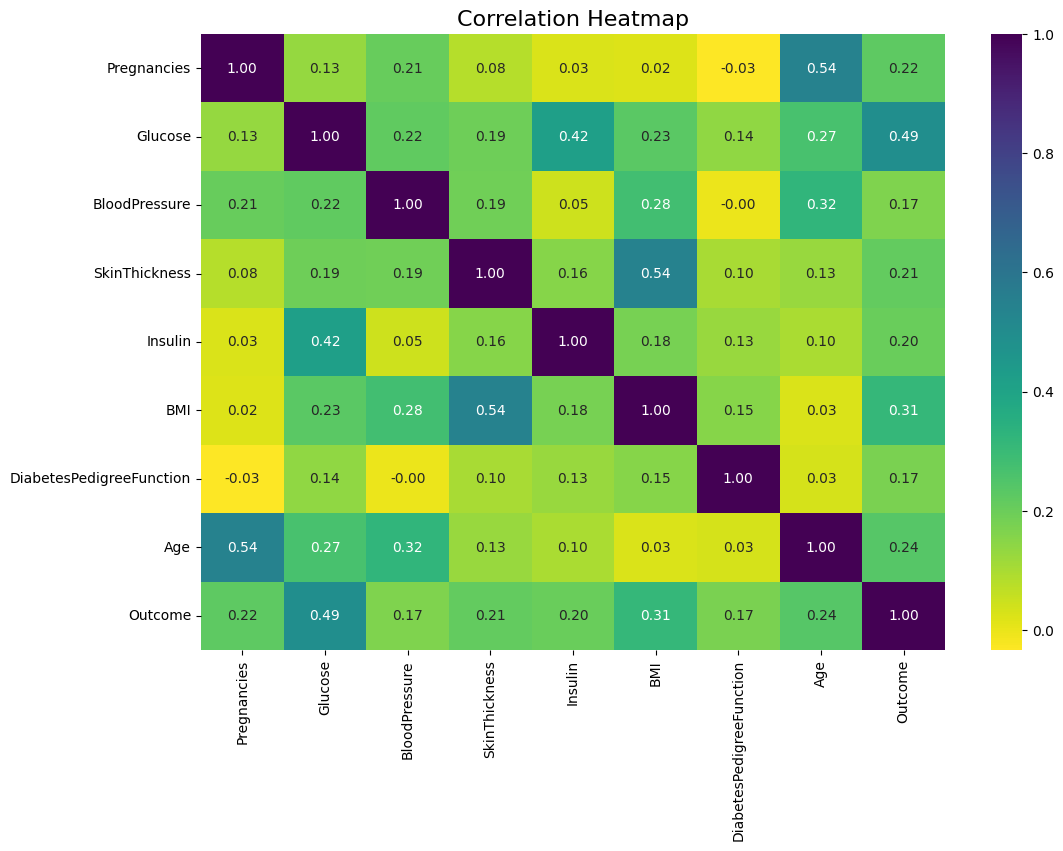

In [12]:

corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='viridis_r', annot=True, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()



In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [14]:

cor_target = abs(corr['Outcome'])   
relevant_features = cor_target[cor_target > 0.25]
names = [index for index, value in relevant_features.items()]
names.remove("Outcome")

print("Selected Features based on correlation > 0.25:")
pprint.pprint(names)
X = df[names]
y = df["Outcome"]


Selected Features based on correlation > 0.25:
['Glucose', 'BMI']


In [15]:
print(corr['Outcome'].sort_values(ascending=False))


Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64


Assign training data and training labels

In [16]:
# Selected features based on correlation
features = ['Glucose', 'BMI']

# Independent variables (X) = input features
X = df[features]

# Dependent variable (y) = target label
y = df['Outcome']


In [17]:
X = df[names].values  # names = ['Glucose', 'BMI']

y = df['Outcome'].values.reshape(-1, 1)

print("Input features shape:", X.shape)
print("Output label shape:", y.shape)

Input features shape: (768, 2)
Output label shape: (768, 1)


In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Features selected based on correlation > 0.25
X = df[['Glucose', 'BMI']].values
y = df['Outcome'].values

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Train Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)



In [28]:
#Evaluate the model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154


Confusion Matrix:
 [[83 16]
 [21 34]]


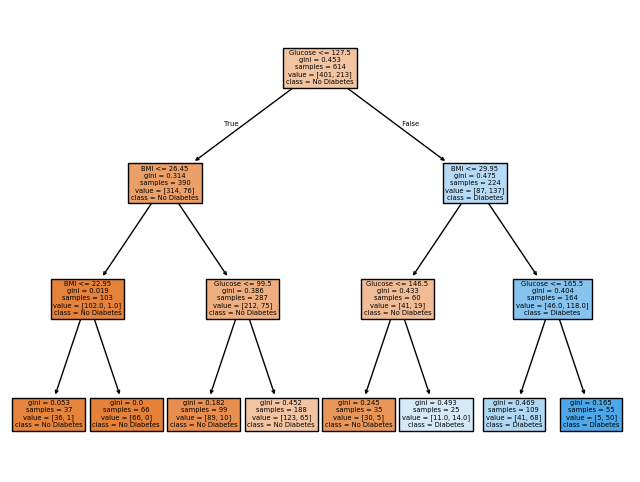

In [ ]:
#Visualize the Decision Tree

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
tree.plot_tree(clf,
               feature_names=['Glucose', 'BMI'],
               class_names=['No Diabetes', 'Diabetes'],
               filled=True)
plt.show()


In [31]:
from sklearn.metrics import balanced_accuracy_score
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))


Balanced Accuracy: 0.7282828282828282
